In [70]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Style of Plots
plt.style.use('fivethirtyeight')

# Read files
df = pd.read_csv("Plane Crash dataset.csv")

In [43]:
#Total Fatalities
print("all fatalities", df["Total fatalities"].sum())

category = 'Year'
numeric = 'Total fatalities'

# group fatalities by cause:  https://datagy.io/pandas-groupby/
gb = df.groupby(category)[numeric].sum()
print("groupby as Series:") 
print(gb, type(gb))

# The issue (for me anyway) is that gb is not a dataframe, the left most "column"
# is its index (which can be non-numeric) and the right (unnamed) column has
# the actual values. Thing is you can't plot with that (x=index y=unnamed) so
# I'll create a new, separate df for plotting:

d = {category: gb.index,
      numeric: gb.values}
dfgb = pd.DataFrame(d)
dfgb


all fatalities 158735
groupby as Series:
Year
1918      29
1919      50
1920      77
1921      78
1922     105
        ... 
2018    1039
2019     588
2020     480
2021     414
2022     199
Name: Total fatalities, Length: 105, dtype: int64 <class 'pandas.core.series.Series'>


,Year,Total fatalities
0,1918,29
1,1919,50
2,1920,77
3,1921,78
4,1922,105
...,...,...
100,2018,1039
101,2019,588
102,2020,480
103,2021,414


In [71]:
df0 = df[df.Country == 'China']

#Total Fatalities
print("all fatalities", df0["Total fatalities"].sum())

category = 'Year'
numeric = 'Total fatalities'

# group fatalities by cause:  https://datagy.io/pandas-groupby/
gb0 = df0.groupby(category)[numeric].sum()

print(gb0)


print("groupby as Series:") 
print(gb0, type(gb0))




# The issue (for me anyway) is that gb is not a dataframe, the left most "column"
# is its index (which can be non-numeric) and the right (unnamed) column has
# the actual values. Thing is you can't plot with that (x=index y=unnamed) so
# I'll create a new, separate df for plotting:

d0 = {category: gb0.index,
      numeric: gb0.values}
dfgb0 = pd.DataFrame(d)
dfgb0


all fatalities 3423
Year
1922     31
1930      4
1931      3
1932      0
1933      0
       ... 
2018     12
2019      0
2020      0
2021      5
2022    132
Name: Total fatalities, Length: 73, dtype: int64
groupby as Series:
Year
1922     31
1930      4
1931      3
1932      0
1933      0
       ... 
2018     12
2019      0
2020      0
2021      5
2022    132
Name: Total fatalities, Length: 73, dtype: int64 <class 'pandas.core.series.Series'>


,Year,Total fatalities
0,1918,29
1,1919,50
2,1920,77
3,1921,78
4,1922,105
...,...,...
100,2018,1039
101,2019,588
102,2020,480
103,2021,414


In [72]:
df1 = df[df.Country == 'United States of America']

#Total Fatalities
print("all fatalities", df1["Total fatalities"].sum())

category = 'Year'
numeric = 'Total fatalities'

# group fatalities by cause:  https://datagy.io/pandas-groupby/
gb1 = df1.groupby(category)[numeric].sum()

print(gb1)


print("groupby as Series:") 
print(gb1, type(gb1))




# The issue (for me anyway) is that gb is not a dataframe, the left most "column"
# is its index (which can be non-numeric) and the right (unnamed) column has
# the actual values. Thing is you can't plot with that (x=index y=unnamed) so
# I'll create a new, separate df for plotting:

d1 = {category: gb1.index,
      numeric: gb1.values}
dfgb1 = pd.DataFrame(d1)
dfgb1


all fatalities 24921
Year
1918      5
1919      4
1920     21
1921     33
1922      4
       ... 
2018     65
2019    106
2020     45
2021     66
2022     15
Name: Total fatalities, Length: 105, dtype: int64
groupby as Series:
Year
1918      5
1919      4
1920     21
1921     33
1922      4
       ... 
2018     65
2019    106
2020     45
2021     66
2022     15
Name: Total fatalities, Length: 105, dtype: int64 <class 'pandas.core.series.Series'>


,Year,Total fatalities
0,1918,5
1,1919,4
2,1920,21
3,1921,33
4,1922,4
...,...,...
100,2018,65
101,2019,106
102,2020,45
103,2021,66


Text(0.5, 0.98, 'Fatalities by Year')

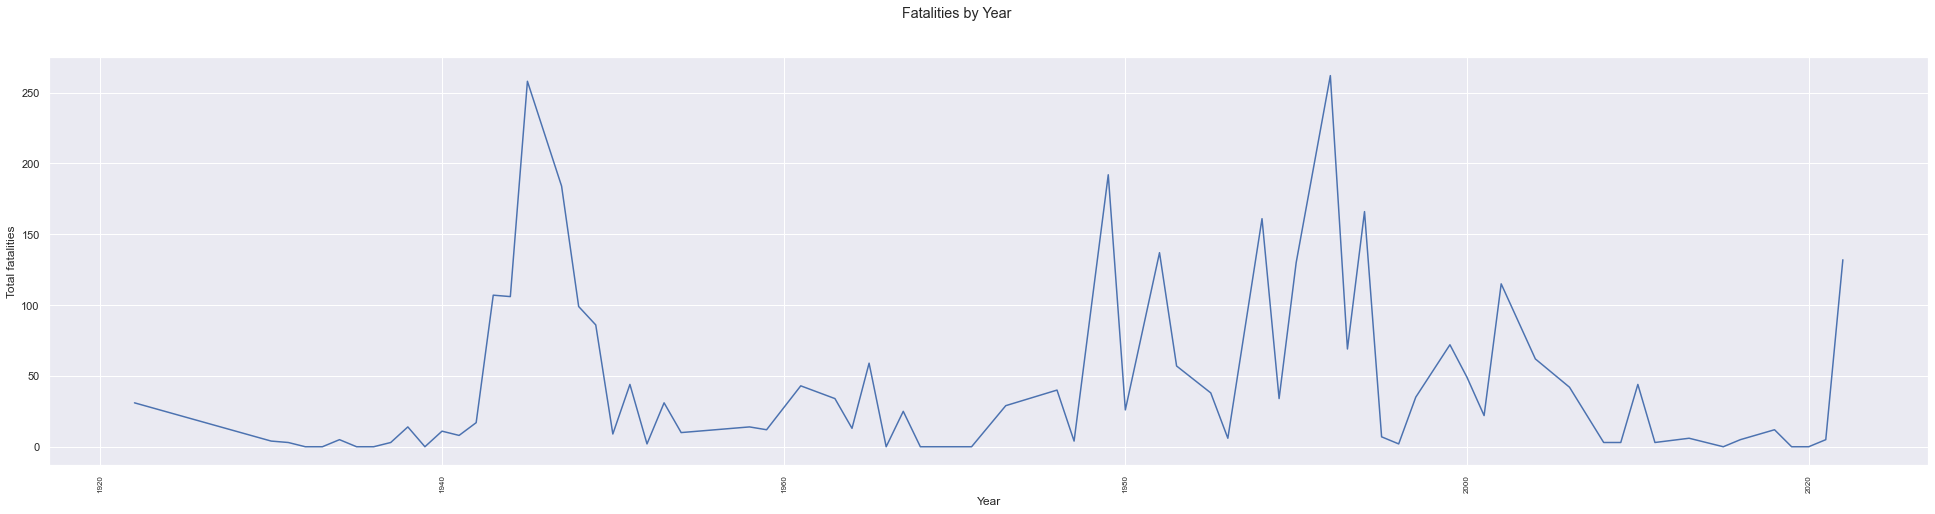

In [29]:
# Plot 1
fig, ax = plt.subplots(figsize=(30, 7))  # new plot

ax = sns.lineplot(x="Year", y="Total fatalities", # which columns for x and y
                    data=dfgb0, # in which dataframe
                    ci=0, # no error bars (much faster!)
                    ) 


plt.xticks(rotation=90)
ax.tick_params(axis='x', which='both', labelsize=8)
fig.suptitle('Fatalities by Year') # Not sure how this is different from ax.set_title ...

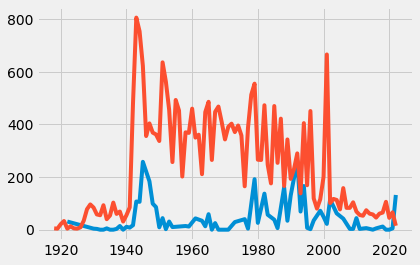

In [18]:
fig = plt.figure()

for frame in [dfgb0, dfgb1]:
    plt.plot(frame['Year'], frame['Total fatalities'])

plt.show()

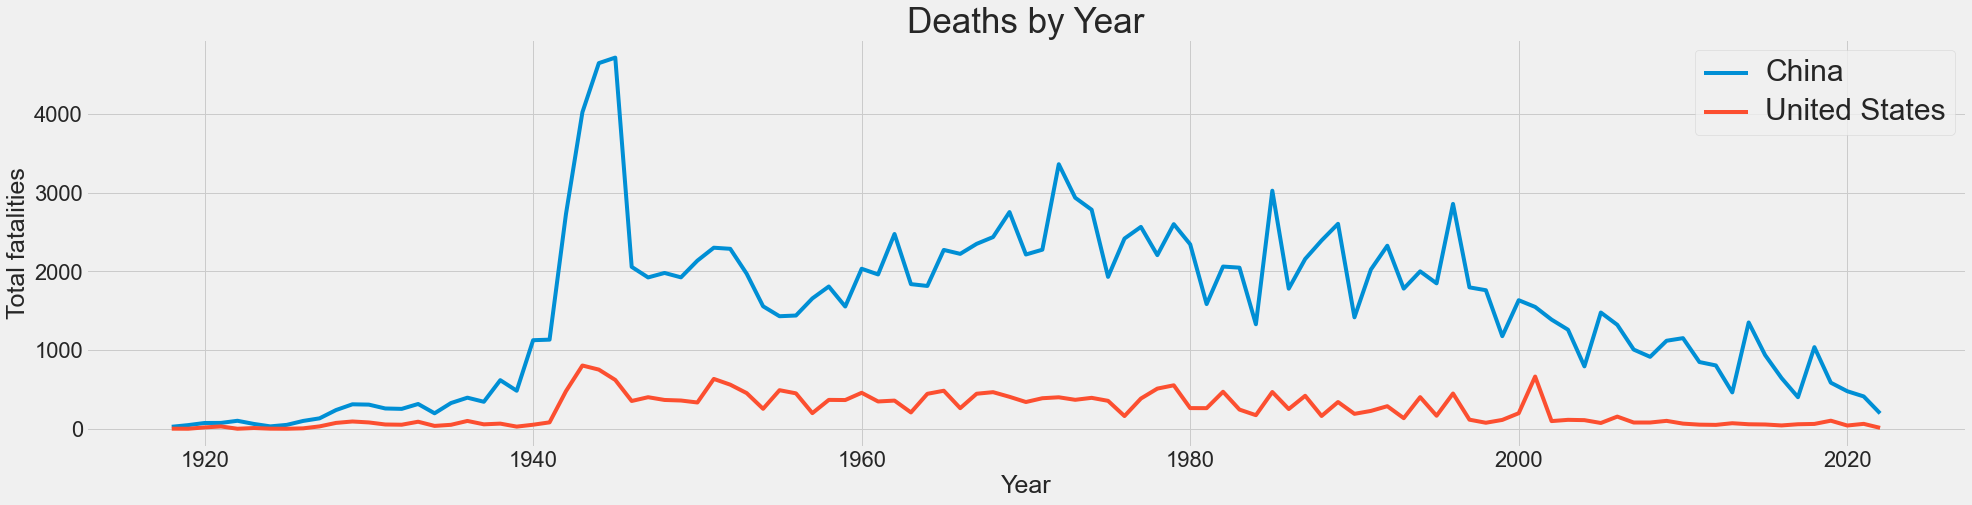

In [80]:
name = 'Death_By_Year_China_US_Line'
dfgb = pd.concat([dfgb0, dfgb1]).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(30, 7))  # new plot

# plot df
ax = sns.lineplot(data=dfgb0, x = 'Year', y = 'Total fatalities',label="China", ci=0)
ax = sns.lineplot(data=dfgb1, x = 'Year', y = 'Total fatalities',label="United States", ci=0)

# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize='30')
ax.set_xlabel(ax.get_xlabel(), fontsize='25')
ax.set_ylabel(ax.get_ylabel(), fontsize='25')

ax.set_title("Deaths by Year", fontsize='35')
plt.show()

fig = ax.get_figure()
fig.savefig("images/" + name + ".png") 
